In [1]:
import pandas as pd

df = pd.read_csv("road_accidents.csv")
df.head()


,Accident_ID,Date,Month,Accidents,Injuries,Fatalities,Weather,Vehicle_Type,Road_Type,Speed_Limit,Alcohol_Involved,Severity
0,1,2024-01-03,Jan,3,2,0,Clear,Car,Highway,80,0,Medium
1,2,2024-01-05,Jan,5,3,1,Rain,Bike,City,50,0,High
2,3,2024-01-09,Jan,2,1,0,Fog,Truck,Highway,60,1,Medium
3,4,2024-01-12,Jan,6,4,1,Clear,Bus,Rural,70,0,High
4,5,2024-01-18,Jan,4,3,0,Rain,Car,City,40,0,Medium


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter plotting magic (shows plots inline)
%matplotlib inline

# Visual settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,5)


In [6]:
# Load dataset (file should be in same folder as this notebook)
df = pd.read_csv("road_accidents.csv")

# Convert Date to datetime and sort by date (helps for time-series)
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df = df.sort_values("Date").reset_index(drop=True)

# Ensure Month is categorical in calendar order
month_order = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
df["Month"] = pd.Categorical(df["Month"], categories=month_order, ordered=True)

# Quick sanity checks (run to view)
print("Rows, Columns:", df.shape)
display(df.head())


Rows, Columns: (120, 12)


,Accident_ID,Date,Month,Accidents,Injuries,Fatalities,Weather,Vehicle_Type,Road_Type,Speed_Limit,Alcohol_Involved,Severity
0,1,2024-01-03,Jan,3,2,0,Clear,Car,Highway,80,0,Medium
1,2,2024-01-05,Jan,5,3,1,Rain,Bike,City,50,0,High
2,3,2024-01-09,Jan,2,1,0,Fog,Truck,Highway,60,1,Medium
3,4,2024-01-12,Jan,6,4,1,Clear,Bus,Rural,70,0,High
4,5,2024-01-18,Jan,4,3,0,Rain,Car,City,40,0,Medium


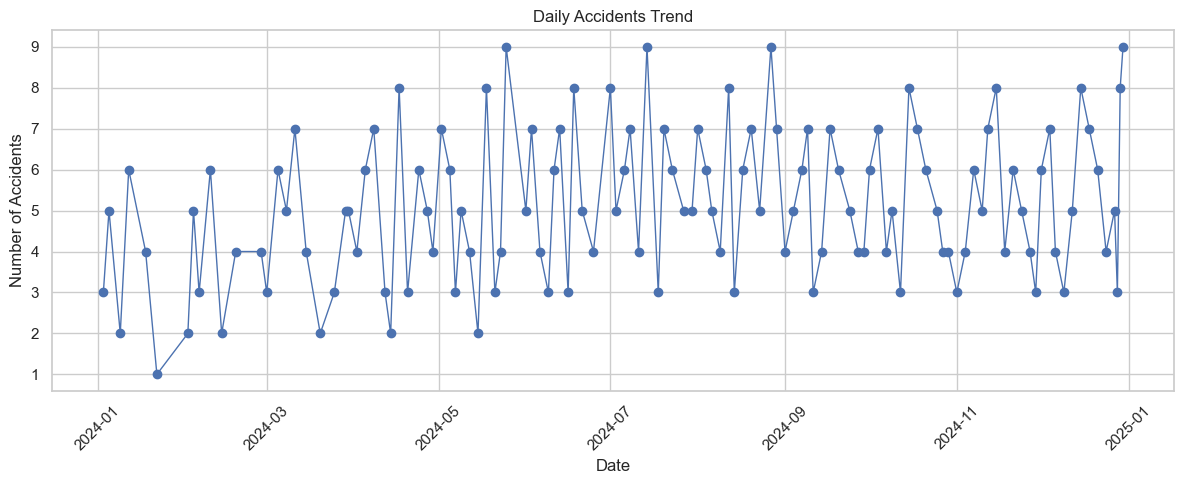

In [7]:
plt.figure(figsize=(12,5))
# aggregate accidents by date (if multiple same dates)
daily = df.groupby("Date")["Accidents"].sum().reset_index()
plt.plot(daily["Date"], daily["Accidents"], marker="o", linewidth=1)
plt.title("Daily Accidents Trend")
plt.xlabel("Date")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Akshata Waghmare\AppData\Local\Temp\ipykernel_7632\1661798697.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly = df.groupby("Month")["Accidents"].sum().reindex(month_order)


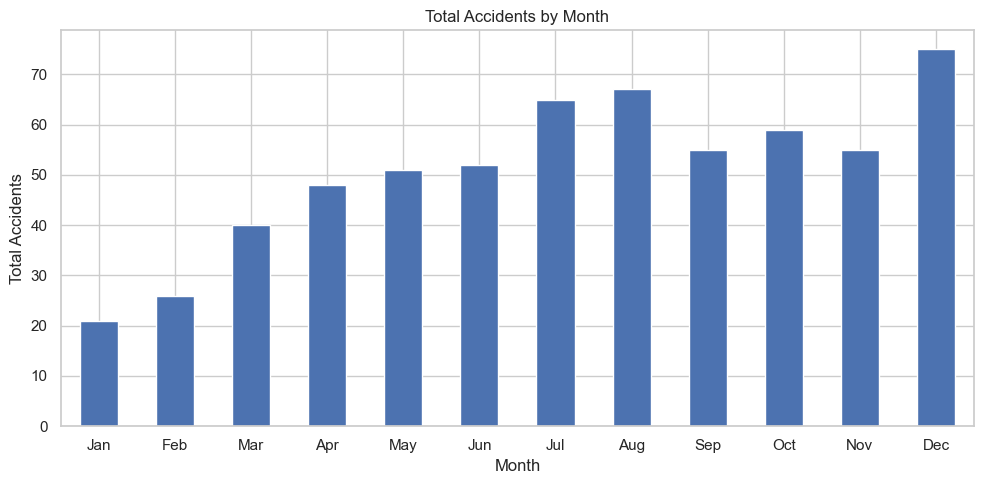

In [8]:
plt.figure(figsize=(10,5))
monthly = df.groupby("Month")["Accidents"].sum().reindex(month_order)
monthly.plot(kind="bar")
plt.title("Total Accidents by Month")
plt.xlabel("Month")
plt.ylabel("Total Accidents")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


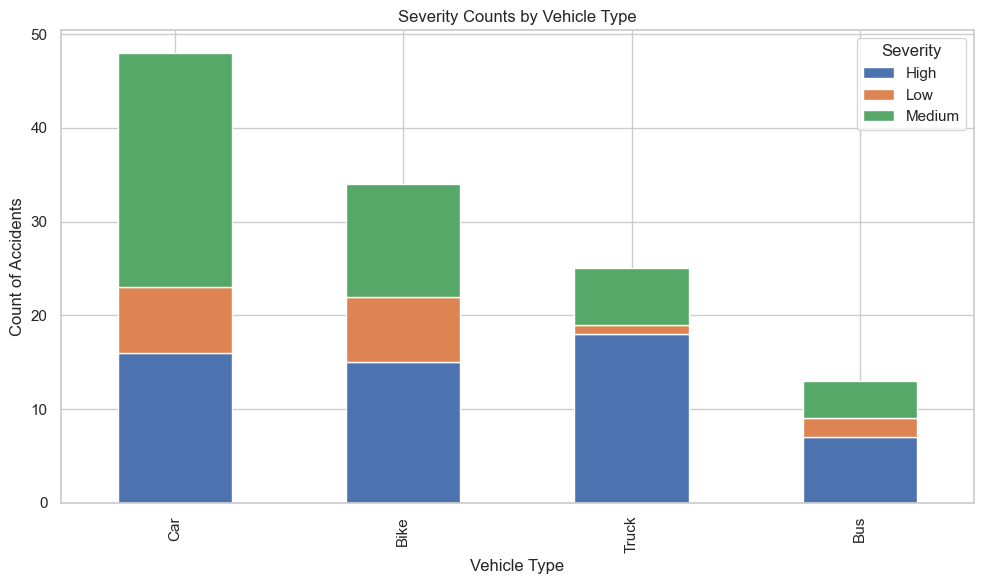

In [9]:
# pivot counts: rows vehicle types, columns severity
pivot = pd.crosstab(df["Vehicle_Type"], df["Severity"]).reindex(index=df["Vehicle_Type"].unique())
pivot.plot(kind="bar", stacked=True, figsize=(10,6))
plt.title("Severity Counts by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Count of Accidents")
plt.legend(title="Severity")
plt.tight_layout()
plt.show()


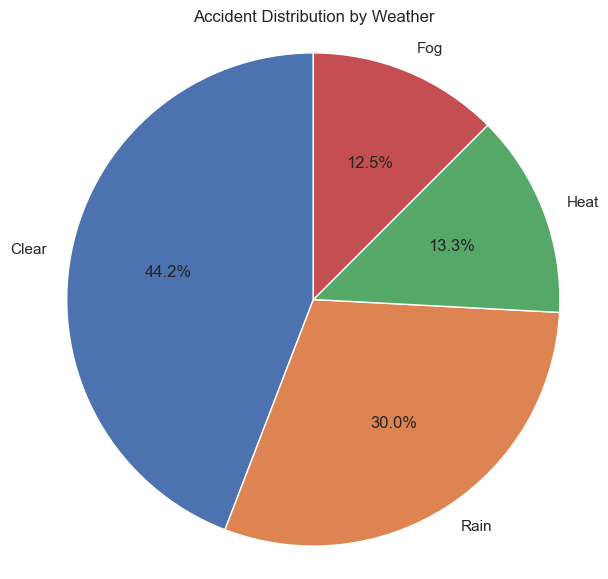

In [10]:
plt.figure(figsize=(7,7))
weather_counts = df["Weather"].value_counts()
plt.pie(weather_counts, labels=weather_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Accident Distribution by Weather")
plt.axis("equal")
plt.show()


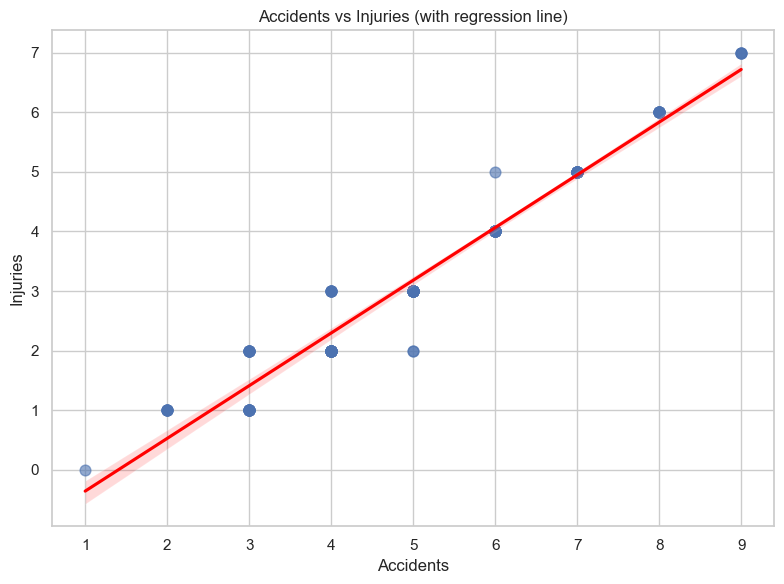

In [11]:
plt.figure(figsize=(8,6))
sns.regplot(x="Accidents", y="Injuries", data=df, scatter_kws={"s":60, "alpha":0.6}, line_kws={"color":"red"})
plt.title("Accidents vs Injuries (with regression line)")
plt.xlabel("Accidents")
plt.ylabel("Injuries")
plt.tight_layout()
plt.show()


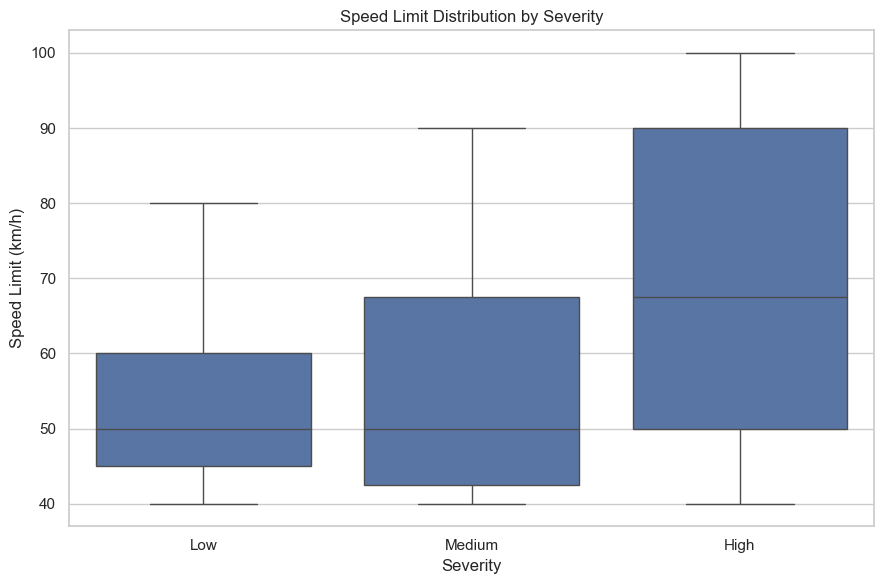

In [12]:
plt.figure(figsize=(9,6))
sns.boxplot(x="Severity", y="Speed_Limit", data=df, order=["Low","Medium","High"])
plt.title("Speed Limit Distribution by Severity")
plt.xlabel("Severity")
plt.ylabel("Speed Limit (km/h)")
plt.tight_layout()
plt.show()


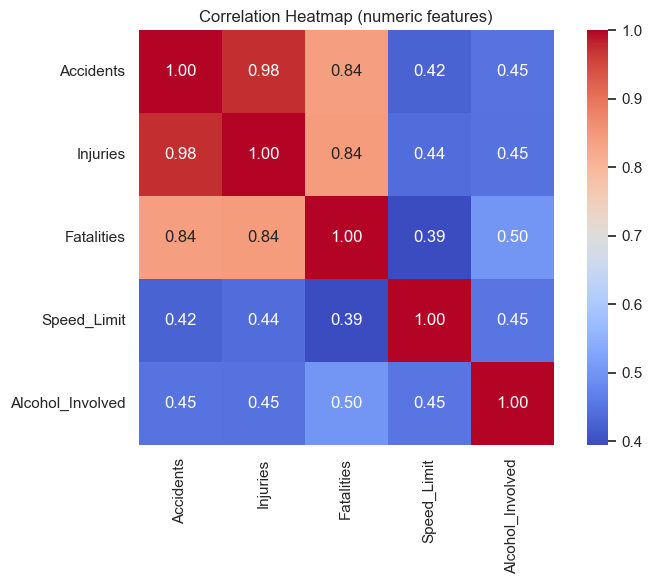

In [13]:
# select numeric columns
num_cols = ["Accidents","Injuries","Fatalities","Speed_Limit","Alcohol_Involved"]
corr = df[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Heatmap (numeric features)")
plt.tight_layout()
plt.show()


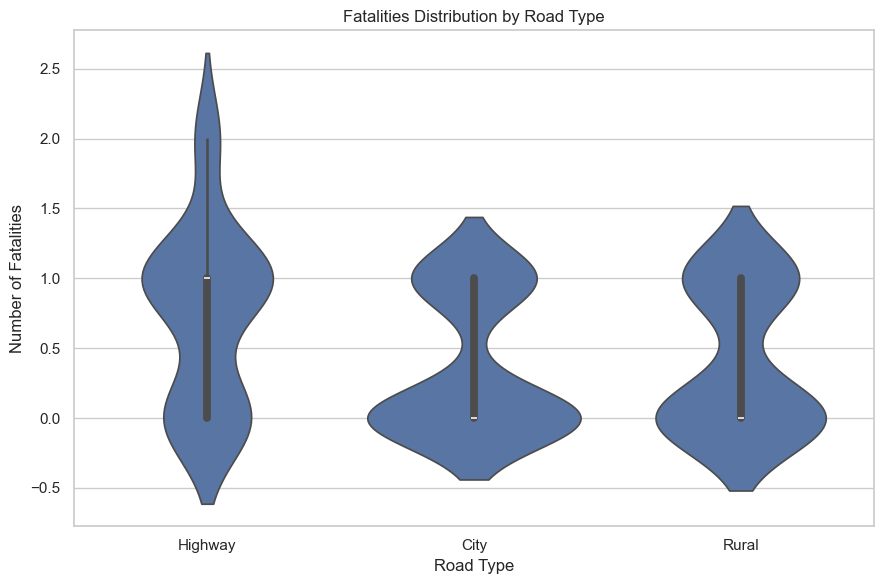

In [14]:
plt.figure(figsize=(9,6))
sns.violinplot(x="Road_Type", y="Fatalities", data=df, inner="box")
plt.title("Fatalities Distribution by Road Type")
plt.xlabel("Road Type")
plt.ylabel("Number of Fatalities")
plt.tight_layout()
plt.show()
